In [1]:

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


2024-08-09 14:46:04.002608: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 14:46:04.002751: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 14:46:04.169712: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
mnist_path = '/kaggle/input/mnist-handwritten-digit-classification/mnist.npz'
with np.load(mnist_path, allow_pickle=True) as f:
    X_train, y_train = f['x_train'], f['y_train']
    X_test, y_test = f['x_test'], f['y_test']

# Display the shape of the datasets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [3]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5

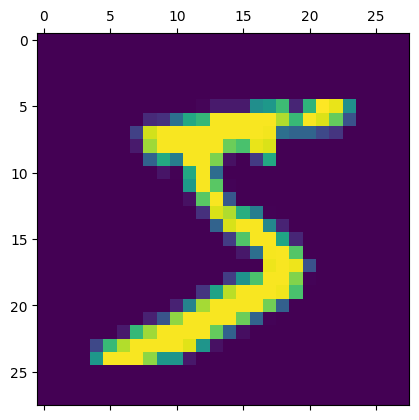

In [4]:
plt.matshow(X_train[0])
y_train[0]

In [5]:
# Feature Scaling
X_train = X_train/255
X_test = X_test/255

In [6]:
# # Basic Neural network
# model = keras.Sequential([
#     keras.Input(shape=(28,28)),
#     keras.layers.Flatten(),
#     keras.layers.Dense(units=100, activation='relu'),
#     keras.layers.Dense(units=50, activation='relu'),
#     keras.layers.Dense(units=10, activation='sigmoid'),
# ])
# model.compile(optimizer = tf.keras.optimizers.Adam(),
#             loss = tf.keras.losses.SparseCategoricalCrossentropy(),
#              metrics=['accuracy'])
# model.fit(X_train,y_train,epochs=10) 

In [7]:
# model.evaluate(X_test,y_test)
# 97% accuracy

In [8]:
# Using convolution neural network
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    keras.layers.Conv2D(32,(3,3),strides=(1,1),padding='same',activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2),strides=(2,2),data_format='channels_last'),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(20,(3,3),strides=(1,1),padding='same',activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2),strides=(2,2),data_format='channels_last'),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss= tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [9]:
history = model.fit(X_train,y_train,epochs=9, batch_size=256, validation_data=(X_test,y_test)) 

Epoch 1/9
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 101ms/step - accuracy: 0.7538 - loss: 0.8124 - val_accuracy: 0.9632 - val_loss: 0.1188
Epoch 2/9
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.9565 - loss: 0.1419 - val_accuracy: 0.9757 - val_loss: 0.0718
Epoch 3/9
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 99ms/step - accuracy: 0.9722 - loss: 0.0926 - val_accuracy: 0.9825 - val_loss: 0.0543
Epoch 4/9
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 98ms/step - accuracy: 0.9770 - loss: 0.0738 - val_accuracy: 0.9847 - val_loss: 0.0479
Epoch 5/9
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 99ms/step - accuracy: 0.9799 - loss: 0.0636 - val_accuracy: 0.9870 - val_loss: 0.0391
Epoch 6/9
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - accuracy: 0.9836 - loss: 0.0533 - val_accuracy: 0.9881 - val_loss: 0.0323
Epoch 7/9
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 99ms/step - accuracy: 0.9852 - loss: 0.0480 - val_accuracy: 0.9887 - val_loss: 0.0320
Epoch 8/9
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 100ms/step - accuracy: 0.9862 - loss: 0.0421 - val_

In [10]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9877 - loss: 0.0359


[0.03001401014626026, 0.9898999929428101]

In [11]:
# 99% accuracy achieved with CNN